# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_type_ride_id = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_type_ride_id

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
#----ASK-------
city_type_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_type_driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
city_type_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
city_type_fare


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_city = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_per_city 

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
#-----ASK----
average_fare_per_driver = city_type_fare/ city_type_driver_count 
average_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [90]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({
          "Total Rides" : city_type_ride_id ,
          "Total Drivers": city_type_driver_count,
          " Total Fares": city_type_fare,
          " Average Fare per Ride": average_fare_per_city,
          "Average Fare per Driver": average_fare_per_driver})

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [91]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [92]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [93]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_df=pyber_data_df.groupby(["type","date"]).sum("fare")
new_df

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36 $43.69  2424875833354             1
      2019-01-02 11:18:32 $52.12  3454018971635             1
      2019-01-03 19:51:01 $19.90  5559509612597             8
      2019-01-04 03:31:26 $24.88  4195619112933             8
      2019-01-06 07:38:40 $47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00 $21.99   117997692054            52
      2019-05-08 04:39:49 $18.45  1811574736337            11
      2019-05-08 07:29:01 $18.55  5682021476085            33
      2019-05-08 11:38:35 $19.77  7837163332630             4
      2019-05-08 13:10:18 $18.04  5616262558026            58

[2375 rows x 3 columns]

In [94]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_df = new_df.reset_index()
new_df


,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,$43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,$52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,$19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,$24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,$47.33,3849747342021,4
...,...,...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99,117997692054,52
2371,Urban,2019-05-08 04:39:49,$18.45,1811574736337,11
2372,Urban,2019-05-08 07:29:01,$18.55,5682021476085,33
2373,Urban,2019-05-08 11:38:35,$19.77,7837163332630,4


In [95]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_ = new_df.pivot(index="date", columns="type", values="fare")
df_


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [96]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df_loc = df_.loc["2019-01-01":"2019-04-28"]
df_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [97]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_loc.index = pd.to_datetime(df_loc.index)
df_loc





type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [98]:
# 7. Check that the datatype for the index is datetime using df.info()
df_loc.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [152]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_week = df_loc.resample("W").sum()
fares_by_week.head()


type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"


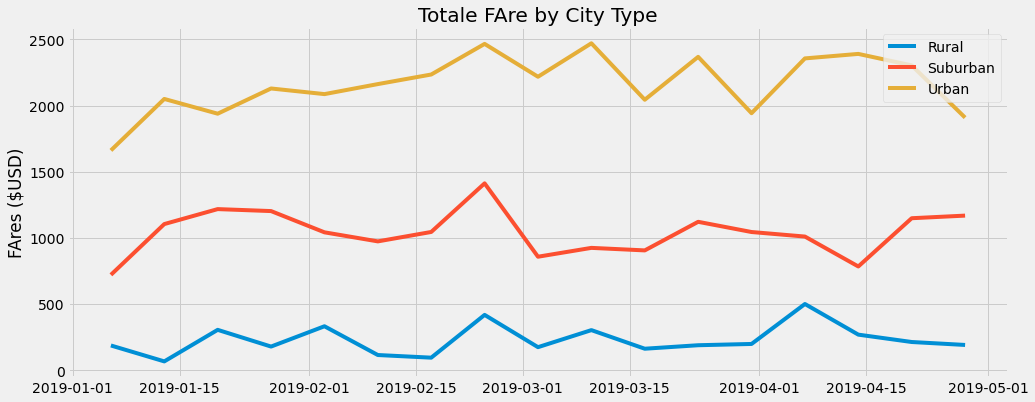

In [159]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import datetime
df1 = fares_by_week.reset_index()
#df1 = fares_by_week.groupby(fares_by_week['date'].dt.to_period('M')).sum()
fig, ax = plt.subplots(figsize=(15, 6))
#ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in fares_by_week.index]
ax.plot(fares_by_week)
ax.set(title ="Totale FAre by City Type",
       ylabel="FAres ($USD)", 
       xlabel= "")
plt.legend(fares_by_week)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

